In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn import tree #draw visualize decison treed
from sklearn.tree import DecisionTreeRegressor as DR

In [ ]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
data.shape

(200, 6)

In [ ]:
cols = data.columns.to_list()

In [ ]:
x = data[cols[:-1]].values
y = data[cols[-1]].values

In [ ]:
x[0:5], y[0:5]

(array([[23, 'F', 'HIGH', 'HIGH', 25.355],
        [47, 'M', 'LOW', 'HIGH', 13.093],
        [47, 'M', 'LOW', 'HIGH', 10.114],
        [28, 'F', 'NORMAL', 'HIGH', 7.798],
        [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object),
 array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object))

In [ ]:
#change the catogorical vars to numerical
le_sex = preprocessing.LabelEncoder()
le_sex.fit(data['Sex'].unique())
x[:,1] = le_sex.transform(x[:,1])


le_bp = preprocessing.LabelEncoder()
le_bp.fit(data['BP'].unique())
x[:,2] = le_bp.transform(x[:,2])

le_chol = preprocessing.LabelEncoder()
le_chol.fit(data['Cholesterol'].unique())
x[:,3] = le_chol.transform(x[:,3])

In [ ]:
x[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(160, 5) (40, 5)
(160,) (40,)


In [ ]:
drugTree = DT(criterion='entropy', max_depth =4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
predTree = drugTree.predict(x_test)
print("Accuracy of Tree: ", metrics.accuracy_score(y_test, predTree))

Accuracy of Tree:  0.975


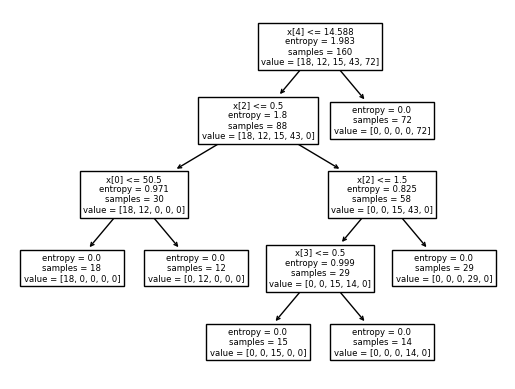

In [ ]:
tree.plot_tree(drugTree)
plt.show()

In [ ]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv")

In [ ]:
data.head(), data.shape

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   
 
    LSTAT  MEDV  
 0   4.98  24.0  
 1   9.14  21.6  
 2   4.03  34.7  
 3   2.94  33.4  
 4    NaN  36.2  ,
 (506, 13))

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data.dropna(inplace =True)
y = data['MEDV']
x = data.drop(columns=["MEDV"])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [ ]:
regTree = DR(criterion='squared_error')
regTree.fit(x_train, y_train)


DecisionTreeRegressor()

In [ ]:
regTree.score(x_test, y_test)

0.7416241245143549

In [ ]:
pred = regTree.predict(x_test)
(pred - y_test).abs().mean()*1000

3365.8227848101264

In [ ]:
regTree_mae = DR(criterion='absolute_error')
regTree_mae.fit(x_train, y_train)

regTree_mae.score(x_test, y_test)

0.7241935425380266

In [ ]:
pred2 = regTree_mae.predict(x_test)
(pred2 - y_test).abs().mean()*1000

3194.9367088607596